In [11]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import tensorflow as tf
  from tensorflow import keras
  import seaborn as sne
  import os
  from datetime import datetime

  import warnings
  warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv("all_stocks_5yr.csv", delimiter = ',', on_bad_lines='skip')
print(data.shape)
print(data.sample(7))

(619040, 7)
              date    open      high       low   close    volume  Name
8538    2017-01-05  116.98  117.1400  114.9500  114.99   3685380   ACN
474064  2015-07-20   41.46   42.5500   39.8000   40.47  52286509  PYPL
9818    2017-02-06  114.68  114.8250  113.2901  114.46   3067477  ADBE
37054   2016-01-15  156.27  163.7700  156.2700  158.68   2703947  ALXN
506546  2016-06-10  142.36  145.7000  142.3600  144.24   2745355   SJM
363331  2016-05-27   31.70   31.7900   31.4200   31.78   2070908   MAT
524080  2016-01-29  152.27  152.9299  151.2600  152.48   2058840   STZ


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [14]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


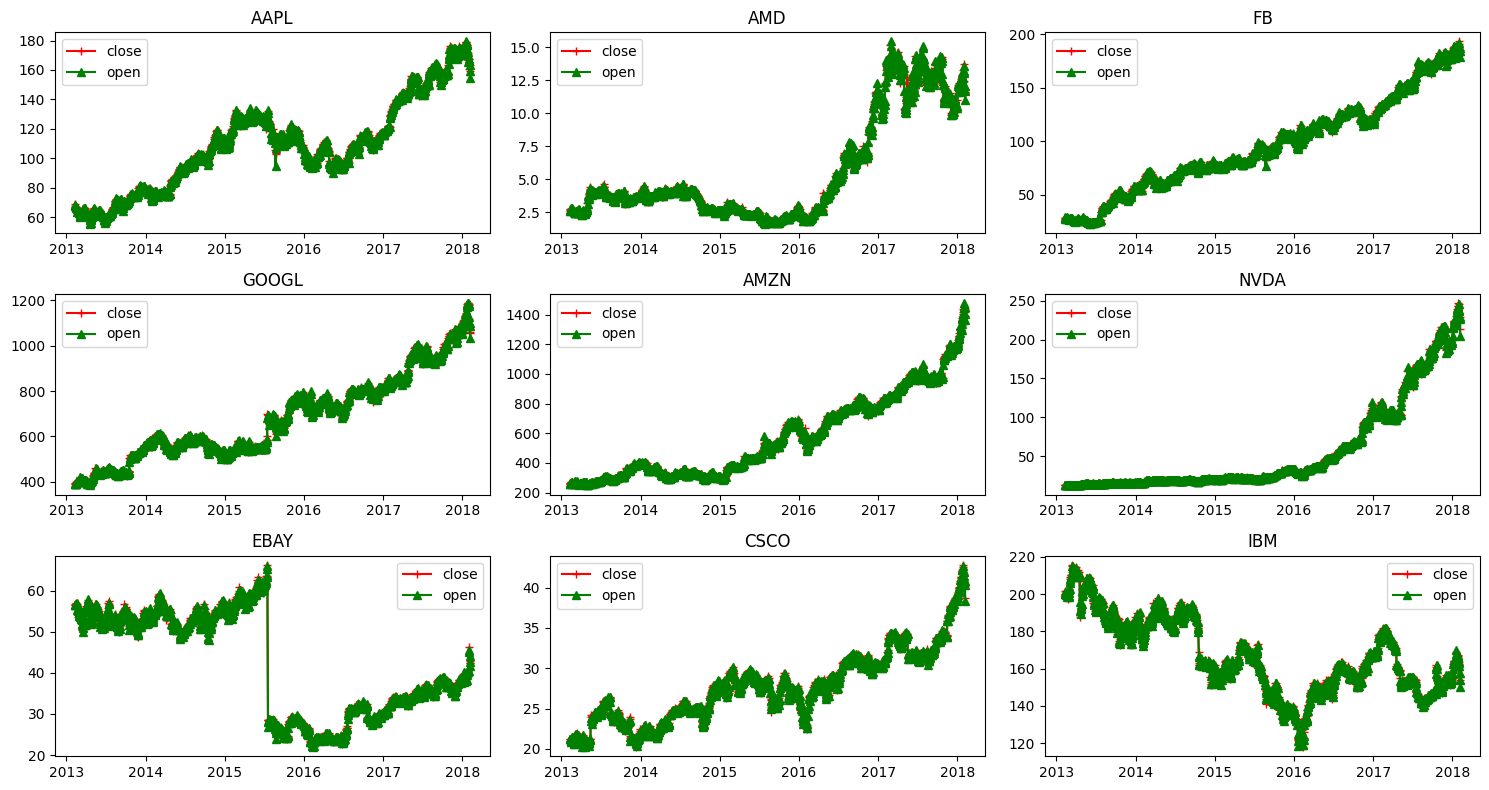

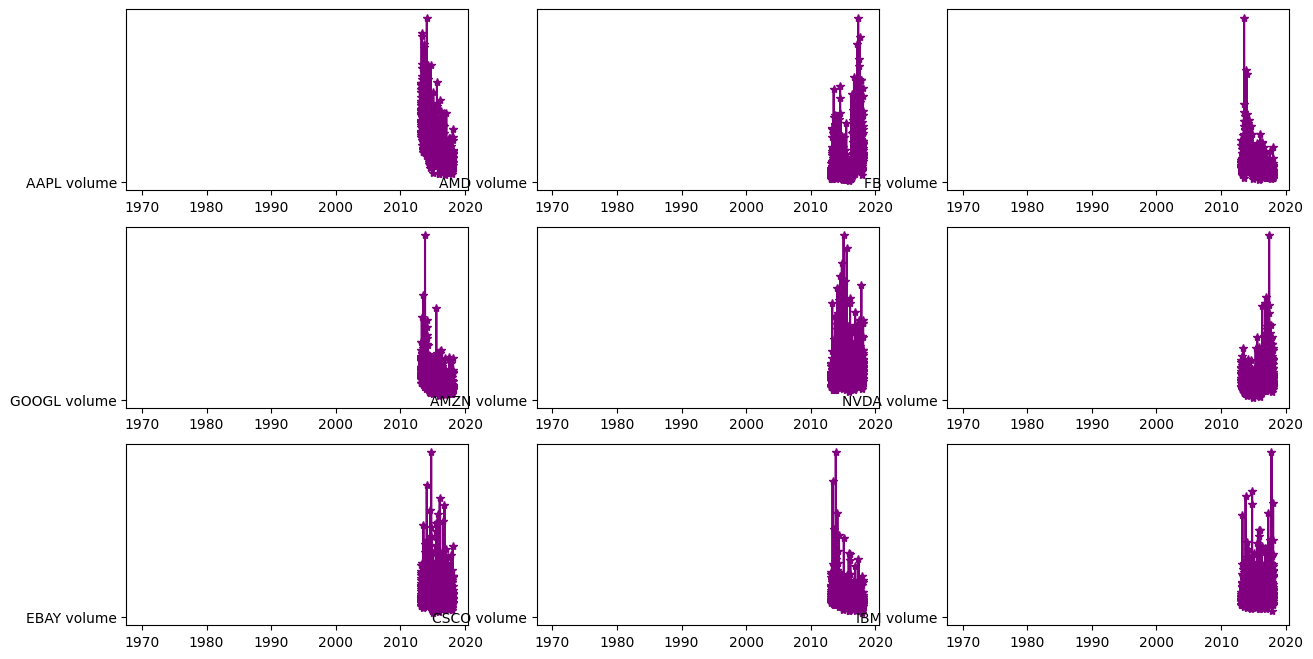

In [15]:
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'IBM']

plt.figure(figsize = (15, 8))
for index, company in enumerate(companies, 1):
  plt.subplot(3, 3, index)
  c = data[data['Name'] == company]
  plt.plot(c['date'], c['close'], c = 'r', label = 'close', marker = '+')
  plt.plot(c['date'], c['open'], c = 'g', label = 'open', marker = '^')

  plt.title(company)
  plt.legend()
  plt.tight_layout()

plt.figure(figsize = (15, 8))
for index, company in enumerate(companies, 1):
  plt.subplot(3, 3, index)
  c = data[data['Name'] == company]
  plt.plot(c['date'], c['volume'], c = 'purple', marker = '*')
  plt.plot(f"{company} volume")
  plt.tight_layout

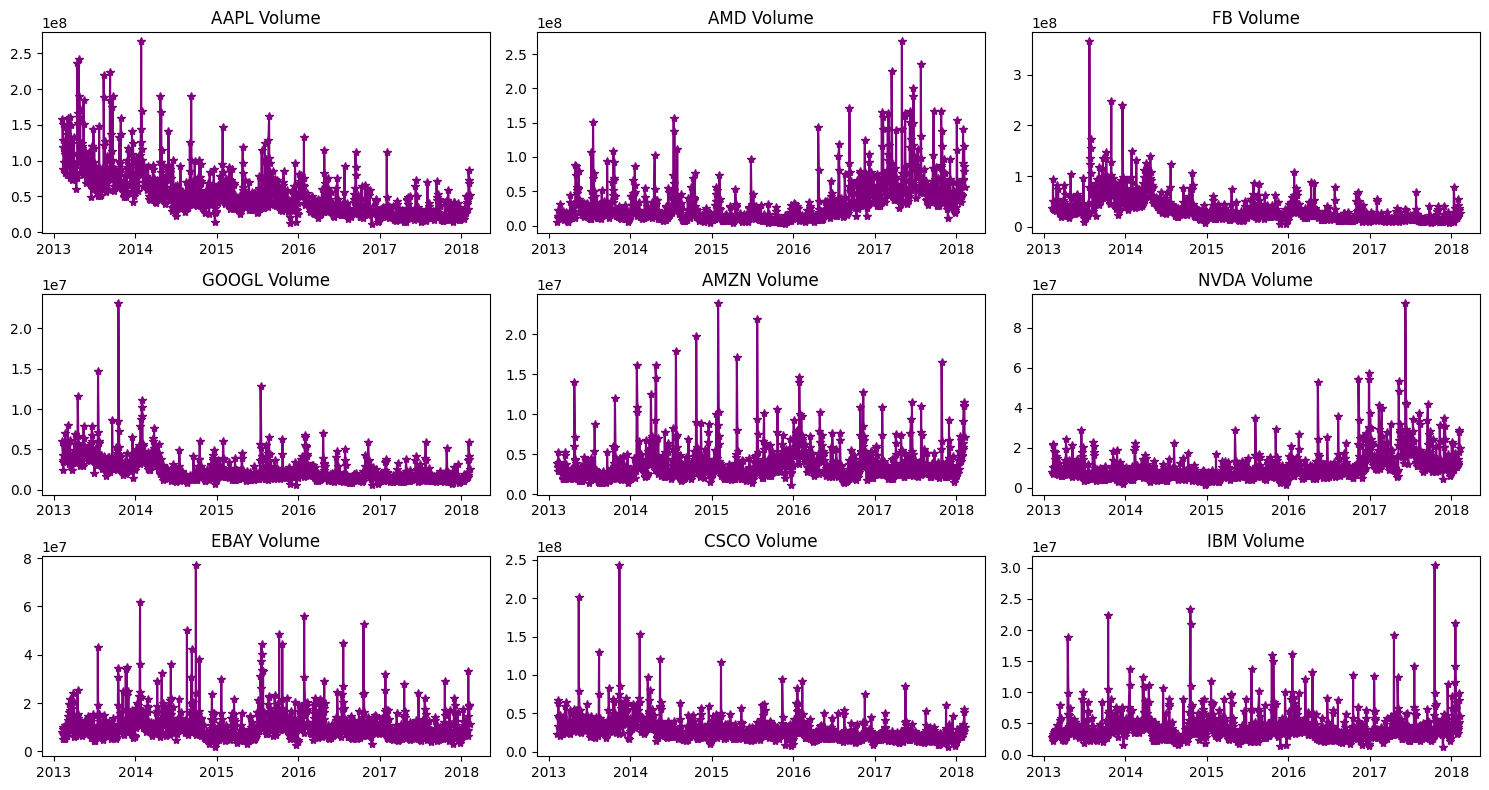

In [16]:
plt.figure(figsize = (15, 8))
for index, company in enumerate(companies, 1):
  plt.subplot(3, 3, index)
  c = data[data['Name'] == company]
  plt.plot(c['date'], c['volume'], c = 'purple', marker = '*')
  plt.title(f"{company} Volume")
  plt.tight_layout()

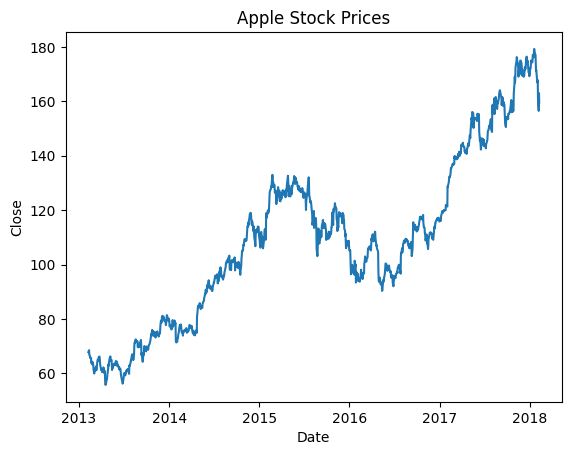

In [18]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013, 3, 1)) & (apple['date'] < datetime(2018, 1, 1))]
plt.plot(apple['date'], apple['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Apple Stock Prices')
plt.show()

In [51]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)

1197


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train  = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [53]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units = 64,
                            return_sequences = True,
                            input_shape = (x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units = 64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <Sequential name=sequential_4, built=True>>

In [54]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0913
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0135
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0084
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0089
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0071
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0075
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0077
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0077
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0081
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0053


In [56]:
test_data = scaled_data[training-60:, :]
x_test = []
y_test = dataset[training:, :]
# y_test = dataset[training : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

mse = np.mean(((predictions- y_test)**2))
rmse = np.sqrt(mse)

print("MSE", mse)
print("RMSE", rmse)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MSE 29.93675277408717
RMSE 5.471448873386936


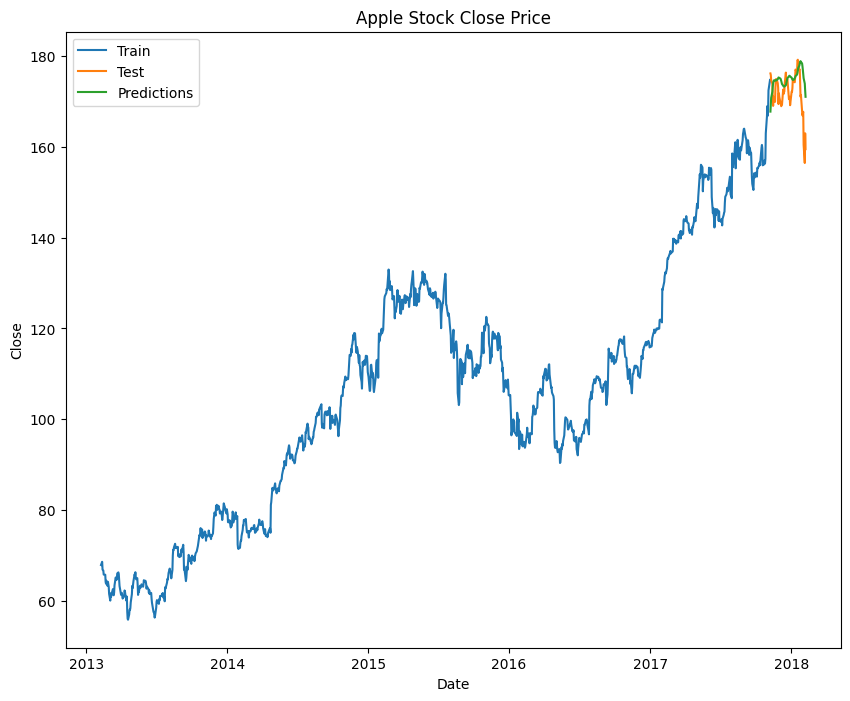

In [58]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])